In [1]:
import requests

API_KEY = "3668f8ada77036a46b51c9d72f411841"

city = "Vellore"
url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric"
response = requests.get(url).json()

# Example: Extract next day's predicted rainfall




In [2]:
lat = 20.14
lon = 92.89
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}"

In [3]:
resp = requests.get(url).json()

In [4]:
resp

{'coord': {'lon': 92.89, 'lat': 20.14},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 302.17,
  'feels_like': 306.11,
  'temp_min': 302.17,
  'temp_max': 302.17,
  'pressure': 1007,
  'humidity': 71,
  'sea_level': 1007,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 3.66, 'deg': 266, 'gust': 3.05},
 'clouds': {'all': 100},
 'dt': 1762150831,
 'sys': {'country': 'MM', 'sunrise': 1762127453, 'sunset': 1762168381},
 'timezone': 23400,
 'id': 1307641,
 'name': 'Myoma',
 'cod': 200}

In [28]:
url=f"https://pro.openweathermap.org/data/2.5/forecast/hourly?lat={lat}&lon={lon}&appid={API_KEY}"

In [29]:
res = requests.get(url).json()

In [30]:
res

{'cod': 401,
 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}

In [32]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

   ---------------------------------------- 0.0/681.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/681.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/681.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/681.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/681.4 kB ? eta -:--:--
   --------------- ------------------------ 262.1/681.4 kB ? eta -:--:--
   --------------- ------------------------ 262.1/681.4 kB ? eta -:--:--
   ----------------------------- -------- 524.3/681.4 kB 524.3 kB/s eta 0:00:01
   ----------------------------- -------- 524.3/681.4 kB 524.3 kB/s eta 0:00:01
   ---------------------------------------- 681.4/681.4 kB 559.0 kB/s  0:00:01
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 M

In [5]:
import requests
import pandas as pd

def get_rainfall_forecast(lat, lon):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "daily": "precipitation_sum",
        "timezone": "auto"
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Create a DataFrame for easy viewing
    df = pd.DataFrame({
        "date": data["daily"]["time"],
        "rainfall_mm": data["daily"]["precipitation_sum"]
    })
    
    print("📍 Location:", f"Lat {lat}, Lon {lon}")
    print(df)
    return df


get_rainfall_forecast(19, 72)


📍 Location: Lat 19, Lon 72
         date  rainfall_mm
0  2025-11-03          2.4
1  2025-11-04          0.4
2  2025-11-05          0.0
3  2025-11-06          1.1
4  2025-11-07          0.3
5  2025-11-08          0.0
6  2025-11-09          0.0


,date,rainfall_mm
0,2025-11-03,2.4
1,2025-11-04,0.4
2,2025-11-05,0.0
3,2025-11-06,1.1
4,2025-11-07,0.3
5,2025-11-08,0.0
6,2025-11-09,0.0


In [36]:
!pip install tabula-py camelot-py[cv] pandas


  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.0 MB 2.1 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/12.0 MB 2.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.0 MB 2.4 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/12.0 MB 2.4 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.0 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.0 MB 2.0 MB/s eta

  You can safely remove it manually.
  You can safely remove it manually.


In [40]:
import PyPDF2
import camelot
import pandas as pd

input_pdf = "groundwater_data.pdf"
output_pdf = "first_500_pages.pdf"

# Step 1: Extract first 500 pages
reader = PyPDF2.PdfReader(input_pdf)
total_pages = len(reader.pages)
end_page = min(500, total_pages)  # avoid overflow if file < 500 pages

writer = PyPDF2.PdfWriter()
for i in range(end_page):
    writer.add_page(reader.pages[i])

with open(output_pdf, "wb") as f:
    writer.write(f)

print(f"✅ Created '{output_pdf}' with {end_page} pages.")

# Step 2: Extract tables from those 500 pages
print("⏳ Extracting tables... This may take 5–10 minutes.")
tables = camelot.read_pdf(output_pdf, pages="1-500", flavor="stream")  # or "lattice" if grid lines

# Step 3: Merge all tables into one DataFrame
if len(tables) == 0:
    print("⚠️ No tables detected. Try switching flavor='lattice'")
else:
    df = pd.concat([t.df for t in tables], ignore_index=True)
    df.columns = df.iloc[0]  # make first row the header
    df = df.drop(0, axis=0).reset_index(drop=True)
    df.to_csv("groundwater_first500.csv", index=False)
    print("✅ Data saved to 'groundwater_first500.csv'")


✅ Created 'first_500_pages.pdf' with 500 pages.
⏳ Extracting tables... This may take 5–10 minutes.
✅ Data saved to 'groundwater_first500.csv'


In [39]:
!pip install PyPDF2

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("groundwater_first500.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,January month Depth to Water Level (In mbgl) Data of Unconfined Aquifer,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,Date,WL(mbgl),NaN
1,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Addateegala,17.46330,82.02710,01-01-24,9.0,NaN
2,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Mallavaram Mammilu,17.50320,82.01240,01-01-24,4.0,NaN
3,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Rayapalli,17.57208,82.00850,01-01-24,1.9,NaN
4,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Veerbhadrapuram,17.43790,82.07400,01-01-24,1.4,NaN


In [4]:
df.drop(columns=['Unnamed: 8'],inplace=True)

In [5]:
# Set the first row as column names
df.columns = df.iloc[0]

# Drop that first row since it's now the header
df = df.drop(index=0).reset_index(drop=True)


In [6]:
df.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,Date,WL(mbgl)
0,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Addateegala,17.46330,82.02710,01-01-24,9.0
1,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Mallavaram Mammilu,17.50320,82.01240,01-01-24,4.0
2,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Rayapalli,17.57208,82.00850,01-01-24,1.9
3,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Veerbhadrapuram,17.43790,82.07400,01-01-24,1.4
4,Andhra Pradesh,Alluri Sitharama Raju,Ananthagiri,Anantagiri,18.23880,83.00110,01-01-24,5.3


In [7]:
df.dtypes

0
STATE_UT     object
DISTRICT     object
BLOCK        object
VILLAGE      object
LATITUDE     object
LONGITUDE    object
Date         object
WL(mbgl)     object
dtype: object

In [8]:
df['LATITUDE'] = pd.to_numeric(
    df['LATITUDE'].where(df['LATITUDE'] != 'LATITUDE'),
    errors='coerce'
)


In [9]:
num_cols = ['LATITUDE', 'LONGITUDE', 'WL(mbgl)']

# Convert each to numeric safely
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df.dtypes

0
STATE_UT      object
DISTRICT      object
BLOCK         object
VILLAGE       object
LATITUDE     float64
LONGITUDE    float64
Date          object
WL(mbgl)     float64
dtype: object

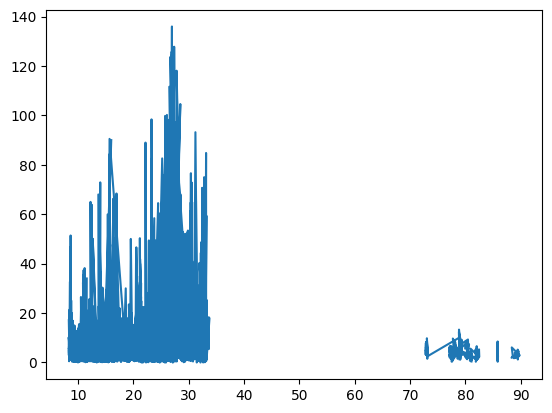

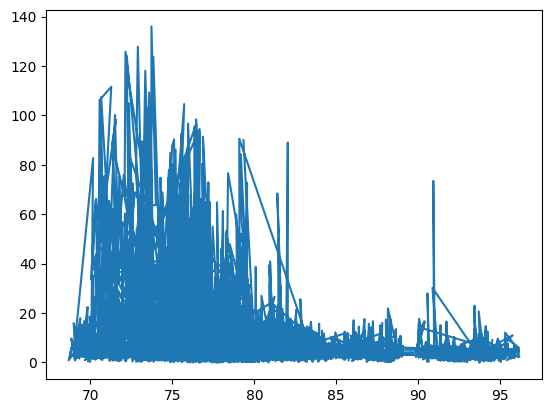

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(df['LATITUDE'], df['WL(mbgl)'])
plt.show()
plt.plot(df['LONGITUDE'], df['WL(mbgl)'])
plt.show()

<Axes: xlabel='LONGITUDE', ylabel='Density'>

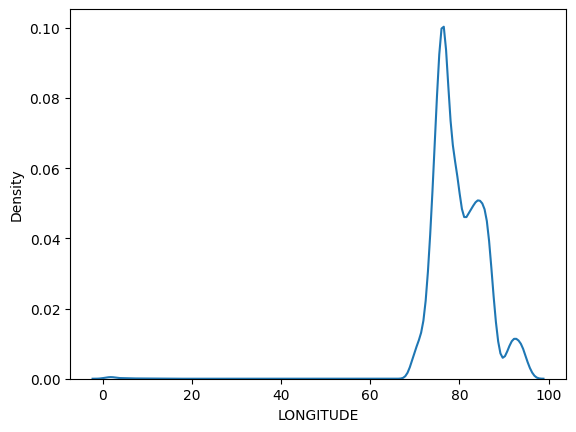

In [12]:
sns.kdeplot(df['LONGITUDE'])

In [13]:
df.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,Date,WL(mbgl)
0,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Addateegala,17.46330,82.0271,01-01-24,9.0
1,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Mallavaram Mammilu,17.50320,82.0124,01-01-24,4.0
2,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Rayapalli,17.57208,82.0085,01-01-24,1.9
3,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Veerbhadrapuram,17.43790,82.0740,01-01-24,1.4
4,Andhra Pradesh,Alluri Sitharama Raju,Ananthagiri,Anantagiri,18.23880,83.0011,01-01-24,5.3


In [15]:
df.to_csv("groundwaterdf.csv")

In [1]:
import pandas as pd
df=pd.read_csv('groundwaterdf.csv')

In [2]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.dropna

<bound method DataFrame.dropna of              STATE_UT               DISTRICT         BLOCK  \
0      Andhra Pradesh  Alluri Sitharama Raju   Addateegala   
1      Andhra Pradesh  Alluri Sitharama Raju   Addateegala   
2      Andhra Pradesh  Alluri Sitharama Raju   Addateegala   
3      Andhra Pradesh  Alluri Sitharama Raju   Addateegala   
4      Andhra Pradesh  Alluri Sitharama Raju   Ananthagiri   
...               ...                    ...           ...   
20193           Bihar              Sitamarhi         Pupri   
20194           Bihar              Sitamarhi         Pupri   
20195           Bihar              Sitamarhi          Riga   
20196           Bihar              Sitamarhi          Riga   
20197           Bihar              Sitamarhi  Runnisaidpur   

                  VILLAGE  LATITUDE  LONGITUDE      Date  WL(mbgl)  
0             Addateegala  17.46330   82.02710  01-01-24       9.0  
1      Mallavaram Mammilu  17.50320   82.01240  01-01-24       4.0  
2             

In [4]:
import numpy as np

# Remove inf and -inf
df = df.replace([np.inf, -np.inf], np.nan)

# Drop all rows containing NaN values
df = df.dropna()

# (Optional) reset index after removal
df = df.reset_index(drop=True)


In [5]:
import numpy as np

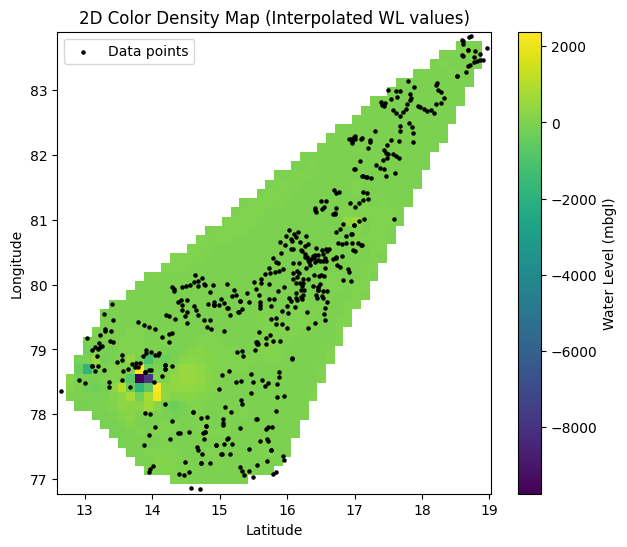

In [6]:
df_clean = df[['LATITUDE', 'LONGITUDE', 'WL(mbgl)']].dropna()

n_datapoints = 500
lat = df_clean['LATITUDE'].values[:n_datapoints]
lon = df_clean['LONGITUDE'].values[:n_datapoints]
wl  = df_clean['WL(mbgl)'].values[:n_datapoints]


xi = np.linspace(lat.min(), lat.max(), 50)
yi = np.linspace(lon.min(), lon.max(), 50)
X, Y = np.meshgrid(xi, yi)


from scipy.interpolate import griddata
Z = griddata((lat, lon), wl, (X, Y), method='cubic')

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
p = plt.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
plt.scatter(lat, lon, color='black', s=5, label='Data points')
plt.colorbar(p, label='Water Level (mbgl)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('2D Color Density Map (Interpolated WL values)')
plt.legend()
plt.show()


In [7]:
df.shape

(14198, 8)

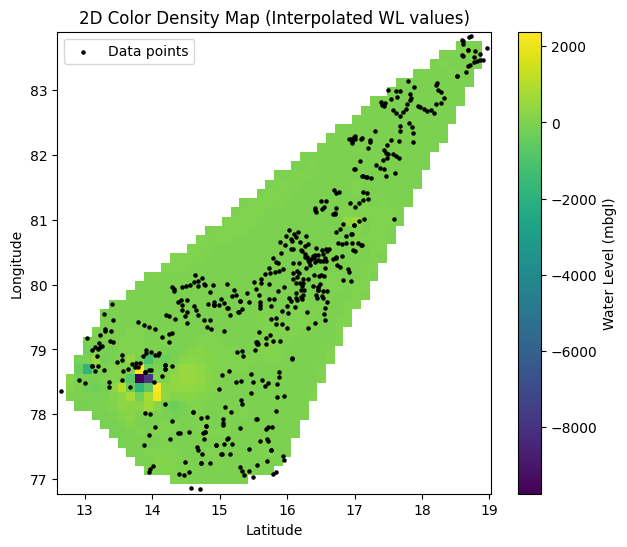

In [8]:
df_clean = df[['LATITUDE', 'LONGITUDE', 'WL(mbgl)']].dropna()


n_datapoints = 500
lat = df_clean['LATITUDE'].values[:n_datapoints]
lon = df_clean['LONGITUDE'].values[:n_datapoints]
wl  = df_clean['WL(mbgl)'].values[:n_datapoints]


xi = np.linspace(lat.min(), lat.max(), 50)
yi = np.linspace(lon.min(), lon.max(), 50)
X, Y = np.meshgrid(xi, yi)


from scipy.interpolate import griddata
Z = griddata((lat, lon), wl, (X, Y), method='cubic')


import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
p = plt.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
plt.scatter(lat, lon, color='black', s=5, label='Data points')
plt.colorbar(p, label='Water Level (mbgl)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('2D Color Density Map (Interpolated WL values)')
plt.legend()
plt.show()


<Axes: xlabel='WL(mbgl)', ylabel='Density'>

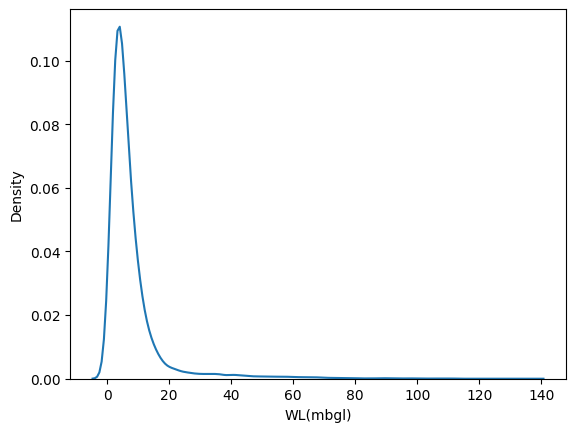

In [9]:
import seaborn as sns
sns.kdeplot(df['WL(mbgl)'])

In [10]:
coords = [12.45, 70.29]

In [ ]:
from scipy.spatial import KDTree
import numpy as np


def getGroundwater(lat, lon):
    points = np.column_stack((df['LATITUDE'], df['LONGITUDE']))
    tree = KDTree(points)


    new_lat, new_lon = lat,lon


    _, idx = tree.query([new_lat, new_lon])


    closest_row = df.iloc[idx]
    return closest_row['WL(mbgl)']



    


np.float64(4.0)

In [12]:
from geopy import Nominatim
def locationBasedGW(location):
    geolocator = Nominatim(user_agent="Tejas")
    location = geolocator.geocode(location)
    lat, lon = location.latitude,location.longitude
    return getGroundwater(lat,lon)


In [13]:
locationBasedGW("Sangli, India")

np.float64(11.9)

In [14]:
df.to_csv("underground.csv")

23:39:54 - cmdstanpy - INFO - Chain [1] start processing
23:39:54 - cmdstanpy - INFO - Chain [1] done processing


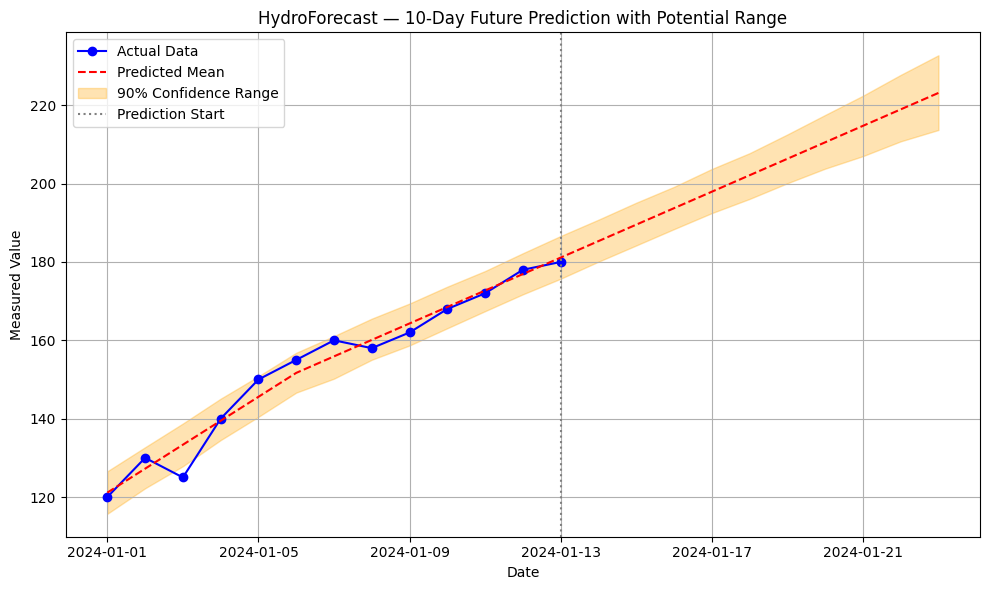


Next 10 Predicted Values (with potential range):

2024-01-14 → Pred: 185.32  |  Range: (180.07, 190.79)
2024-01-15 → Pred: 189.52  |  Range: (184.21, 195.12)
2024-01-16 → Pred: 193.72  |  Range: (188.38, 199.17)
2024-01-17 → Pred: 197.92  |  Range: (192.46, 203.73)
2024-01-18 → Pred: 202.13  |  Range: (196.08, 207.76)
2024-01-19 → Pred: 206.33  |  Range: (200.08, 212.54)
2024-01-20 → Pred: 210.53  |  Range: (203.81, 217.51)
2024-01-21 → Pred: 214.73  |  Range: (207.00, 222.42)
2024-01-22 → Pred: 218.94  |  Range: (210.78, 227.74)
2024-01-23 → Pred: 223.14  |  Range: (213.69, 232.75)


In [19]:
# pip install prophet pandas matplotlib

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

def predict_and_plot_with_uncertainty(values):
    n = len(values)
    if n < 5:
        raise ValueError("Need at least 5 data points for Prophet to work well.")

    # Prepare dataframe for Prophet
    df = pd.DataFrame({
        'ds': pd.date_range(start='2024-01-01', periods=n, freq='D'),
        'y': values
    })

    # Initialize and fit model
    model = Prophet(interval_width=0.9)  # 90% confidence interval
    model.fit(df)

    # Create future dataframe for next 10 days
    future = model.make_future_dataframe(periods=10, freq='D')
    forecast = model.predict(future)

    # Extract next 10 predictions with intervals
    next_10 = forecast.tail(10)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Convert to dictionary for clarity
    predictions = next_10.to_dict(orient='records')

    # --- Plot actual + forecast + uncertainty ---
    plt.figure(figsize=(10, 6))

    # Actual data
    plt.plot(df['ds'], df['y'], 'bo-', label='Actual Data')

    # Predicted trend
    plt.plot(forecast['ds'], forecast['yhat'], 'r--', label='Predicted Mean')

    # Confidence interval (potential range)
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='orange',
        alpha=0.3,
        label='90% Confidence Range'
    )

    # Mark prediction start
    plt.axvline(df['ds'].iloc[-1], color='gray', linestyle=':', label='Prediction Start')

    plt.title("HydroForecast — 10-Day Future Prediction with Potential Range")
    plt.xlabel("Date")
    plt.ylabel("Measured Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return predictions


# Example Usage
if __name__ == "__main__":
    # Example input: water levels or rainfall data
    data = [120, 130, 125, 140, 150, 155, 160, 158, 162, 168, 172, 178, 180]
    predictions = predict_and_plot_with_uncertainty(data)

    print("\nNext 10 Predicted Values (with potential range):\n")
    for p in predictions:
        print(f"{p['ds'].date()} → Pred: {p['yhat']:.2f}  |  Range: ({p['yhat_lower']:.2f}, {p['yhat_upper']:.2f})")


In [16]:
!pip install prophet

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.1 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/12.1 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.1 MB 1.3 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/12.1 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/12.1 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.1 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/12.1 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 

In [20]:
!pip install requests

Rainfall forecast for next 100 hours at (19.076, 72.8777):
2025-11-02T00:00 → 0.3 mm
2025-11-02T01:00 → 0.4 mm
2025-11-02T02:00 → 0.2 mm
2025-11-02T03:00 → 0.4 mm
2025-11-02T04:00 → 0.3 mm
2025-11-02T05:00 → 0.2 mm
2025-11-02T06:00 → 0.5 mm
2025-11-02T07:00 → 0.4 mm
2025-11-02T08:00 → 0.3 mm
2025-11-02T09:00 → 0.3 mm


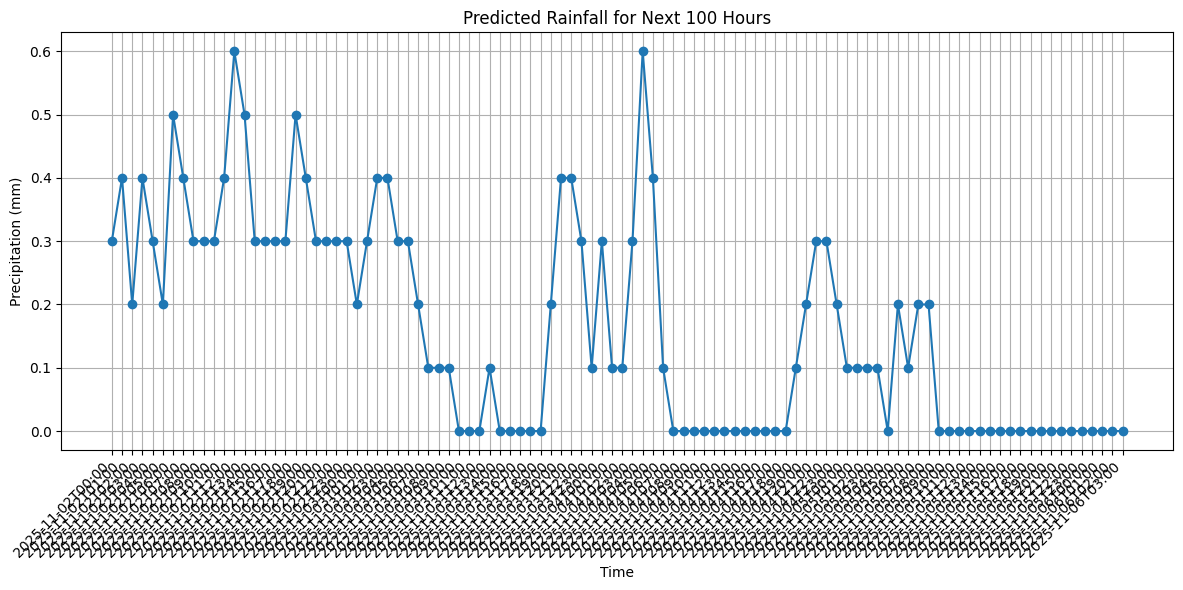

In [22]:
# 📦 Install dependencies (if not already installed)


import requests
import matplotlib.pyplot as plt

# --- Input your location ---
latitude = 19.0760   # Mumbai
longitude = 72.8777  # Mumbai
forecast_hours = 100  # number of hours to predict

# --- Call Open-Meteo API ---
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "precipitation",
    "timezone": "auto"
}

response = requests.get(url, params=params)
data = response.json()

# --- Extract rainfall data ---
times = data["hourly"]["time"][:forecast_hours]
rain = data["hourly"]["precipitation"][:forecast_hours]

# --- Display sample output ---
print(f"Rainfall forecast for next {forecast_hours} hours at ({latitude}, {longitude}):")
for t, r in zip(times[:10], rain[:10]):  # just first 10 samples
    print(f"{t} → {r} mm")

# --- Plot rainfall forecast ---
plt.figure(figsize=(12, 6))
plt.plot(times, rain, marker='o')
plt.xticks(rotation=45, ha='right')
plt.title(f"Predicted Rainfall for Next {forecast_hours} Hours")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


🌦️ 7-Day Rainfall Forecast for (1.076, 2.8777)
2025-11-02: 1.1 mm
2025-11-03: 13.1 mm
2025-11-04: 13.8 mm
2025-11-05: 7.5 mm
2025-11-06: 10.8 mm
2025-11-07: 10.1 mm
2025-11-08: 6.9 mm


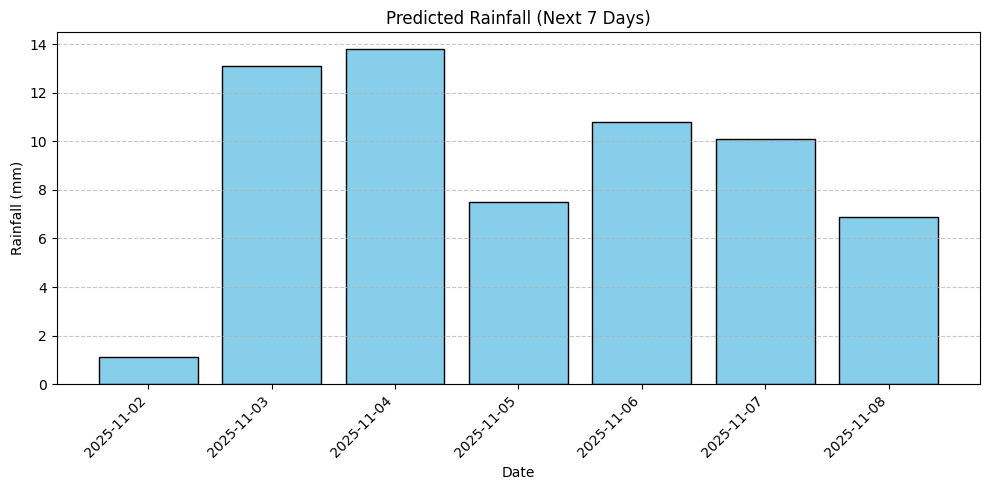

In [24]:

import requests
import matplotlib.pyplot as plt

# --- Input your location (example: Mumbai) ---
latitude = 1.0760
longitude = 2.8777

# --- API request for daily rainfall forecast ---
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "daily": "precipitation_sum",  # daily rainfall total (mm)
    "timezone": "auto"
}

response = requests.get(url, params=params)
data = response.json()

# --- Extract forecast data ---
dates = data["daily"]["time"]
rainfall = data["daily"]["precipitation_sum"]

# --- Print the forecast ---
print(f"🌦️ 7-Day Rainfall Forecast for ({latitude}, {longitude})")
for date, rain in zip(dates, rainfall):
    print(f"{date}: {rain} mm")

# --- Plot the forecast ---
plt.figure(figsize=(10, 5))
plt.bar(dates, rainfall, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title("Predicted Rainfall (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
